# TRANSFER LEARNING


## What is Transfer Learning?
###### Transfer learning is a machine learning method where we reuse a pre-trained model as the starting point for a model on a new task.
###### By applying transfer learning to a new task, one can achieve significantly higher performance than training with only a small amount of data.
###### Researchers and data scientists prefer to start from a pre-trained model that already knows how to classify objects and has learned general features like edges, shapes in images.

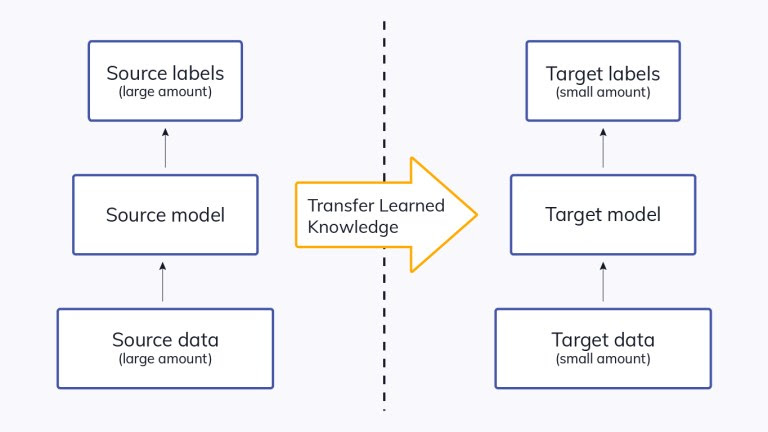

## Traditional Machine Learning VS Transfer Learning

###### 1)Traditional machine learning models require training from scratch, which is computationally expensive and requires a large amount of data to achieve high performance. On the other hand, transfer learning is computationally efficient and helps achieve better results using a small data set.
###### 2)Traditional ML has an isolated training approach where each model is independently trained for a specific purpose, without any dependency on past knowledge. Contrary to that, transfer learning uses knowledge acquired from the pre-trained model to proceed with the task.
###### 3)Transfer learning models achieve optimal performance faster than the traditional ML models. It is because the models that leverage knowledge (features, weights, etc.) from previously trained models already understand the features. It makes it faster than training neural networks from scratch.

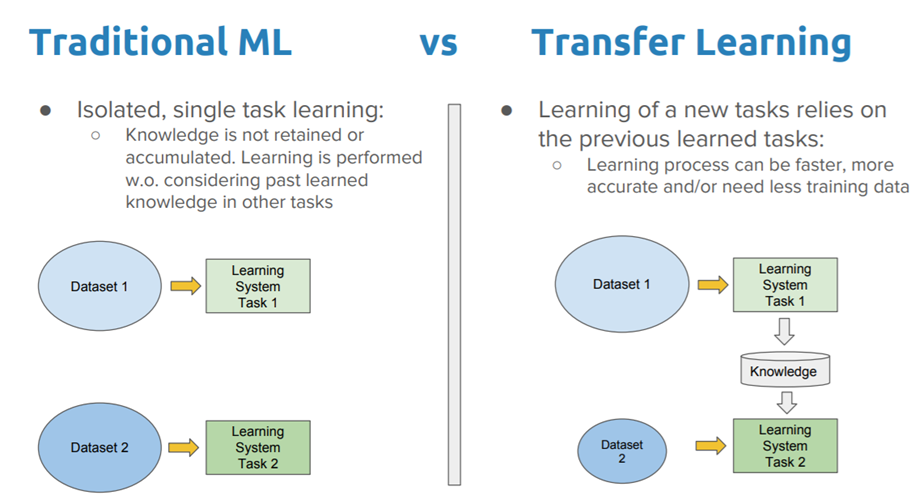

## Classical Transfer Learning Strategies


* WHICH part of the knowledge can be transferred from the source to the target to improve the performance of the target task?
* WHEN to transfer and when not to, so that one improves the target task performance/results and does not degrade them?
* HOW to transfer the knowledge gained from the source model based on our current domain/task?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from glob import glob

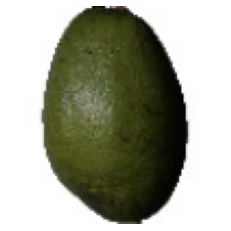

In [2]:
train_path="fruits-360/Training/"
test_path="fruits-360/Test/"

img=load_img(train_path + "Avocado/0_100.jpg")

plt.imshow(img)
plt.axis("off");

In [3]:
x=img_to_array(img)
x.shape

(100, 100, 3)

In [4]:
numberOfClass=len(glob(train_path+"/*")) #Go train path folder and read all(*)
numberOfClass

131

# VGG16

###### Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.

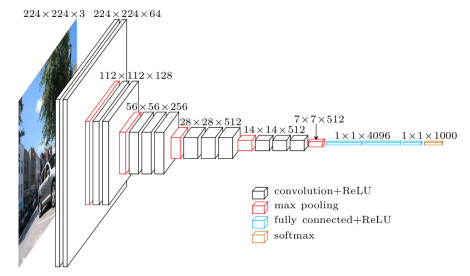

In [5]:
vgg=VGG16()

print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
type(vgg)

keras.engine.functional.Functional

In [7]:
vgg_layer_list= vgg.layers
vgg_layer_list

###### predictions (Dense)         (None, 1000)              4097000 

###### As you see this model use for predict 1000 class. 
###### We must change it!

In [8]:
model=Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [9]:
for layers in model.layers:
    layers.trainable=False
    
model.add(Dense(numberOfClass,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# TRAIN

In [14]:
train_data=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224))
test_data=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224))

batch_size=32

hist=model.fit_generator(train_data,
                        steps_per_epoch=1600/batch_size,
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=800/batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/5


C:\Users\HILAL~1.YUK\AppData\Local\Temp/ipykernel_14456/1146198297.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(train_data,


50/50 [==============================] - 317s 6s/step - loss: 2.4541 - accuracy: 0.4975 - val_loss: 1.4528 - val_accuracy: 0.6212
Epoch 2/5
50/50 [==============================] - 588s 12s/step - loss: 0.8260 - accuracy: 0.7756 - val_loss: 1.1359 - val_accuracy: 0.7375
Epoch 3/5
50/50 [==============================] - 352s 7s/step - loss: 0.4762 - accuracy: 0.8644 - val_loss: 0.7123 - val_accuracy: 0.8200
Epoch 4/5
50/50 [==============================] - 374s 8s/step - loss: 0.3138 - accuracy: 0.9150 - val_loss: 0.8300 - val_accuracy: 0.8263
Epoch 5/5
50/50 [==============================] - 386s 8s/step - loss: 0.2251 - accuracy: 0.9356 - val_loss: 0.6084 - val_accuracy: 0.8662


In [15]:
model.save_weights("weights.h5")

# VISUALIZATION

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


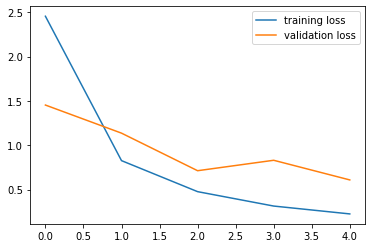

In [21]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label="training loss")
plt.plot(hist.history["val_loss"],label="validation loss")
plt.legend();

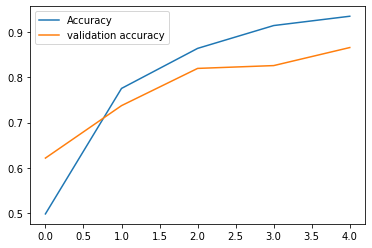

In [20]:
plt.plot(hist.history["accuracy"],label="Accuracy")
plt.plot(hist.history["val_accuracy"],label="validation accuracy")
plt.legend();

In [28]:
# save history
hist_df=pd.DataFrame(hist.history)
import json
with open("kerasResults.json","w") as f:
    hist_df.to_json(f)

In [30]:
#load history
with open("kerasResults.json") as json_file:
    h=json.load(json_file)
kerasResults_df=pd.DataFrame(h)
kerasResults_df

,loss,accuracy,val_loss,val_accuracy
0,2.454095,0.497500,1.452752,0.62125
1,0.825958,0.775625,1.135889,0.73750
2,0.476209,0.864375,0.712318,0.82000
3,0.313792,0.915000,0.829997,0.82625
4,0.225144,0.935625,0.608416,0.86625
